In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'    

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [6]:
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSize(320, 320)
model.setInputSwapRB(True)

<dnn_Model 0x7fe5c7f56a90>

In [7]:
img = cv2.imread('rey.jpg')

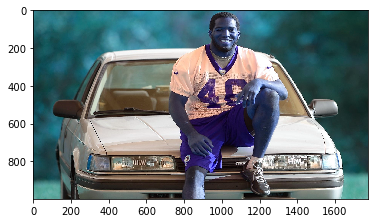

In [8]:
plt.imshow(img)

In [9]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
print(ClassIndex)

[3 1]


In [10]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40),font, fontScale = font_scale, color = (0,255,0), thickness=3)

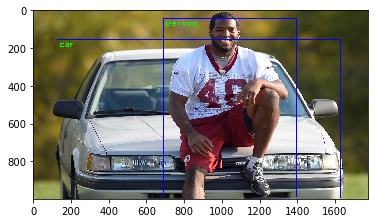

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open WebCam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)

    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten() , confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[0]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()   

[ WARN:0@6.093] global /io/opencv/modules/videoio/src/cap_v4l.cpp (889) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
QApplication: invalid style override 'adwaita' passed, ignoring it.
	Available styles: Windows, Fusion


KeyboardInterrupt: 